In [1]:
import numpy as np
import math

In [5]:
L = 4
d_v= 8
d_k = 8
q = np.random.randn(L,d_k)
k = np.random.randn(L,d_k)
v = np.random.randn(L,d_v)

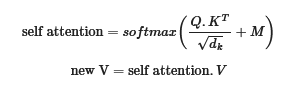

In [7]:
scaled = np.matmul(q,k.T)/math.sqrt(d_k)
scaled.var()

1.1545382270992106

In [9]:
mask = np.tril(np.ones((L,L)))#Masking

    #This is to ensure words don't get context from words generated in the future.
mask

array([[1., 0., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 1., 0.],
       [1., 1., 1., 1.]])

In [10]:
mask[mask == 0] = -1e9
mask[mask == 1] = 0
mask


array([[ 0.e+00, -1.e+09, -1.e+09, -1.e+09],
       [ 0.e+00,  0.e+00, -1.e+09, -1.e+09],
       [ 0.e+00,  0.e+00,  0.e+00, -1.e+09],
       [ 0.e+00,  0.e+00,  0.e+00,  0.e+00]])

In [11]:
scaled + mask

array([[-9.30707540e-01, -9.99999999e+08, -9.99999999e+08,
        -1.00000000e+09],
       [ 4.33483454e-01, -1.52532997e+00, -1.00000000e+09,
        -1.00000000e+09],
       [ 9.47677810e-01,  5.98225493e-01, -6.68695904e-01,
        -1.00000000e+09],
       [-4.46503974e-01, -2.53754966e+00,  2.26942118e+00,
         9.70060740e-02]])

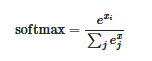

In [12]:
#softmax converts a vector to  a probability distribution
def softmax(x):
  return np.exp(x).T/np.sum(np.exp(x),axis=1).T

attention = softmax(scaled + mask)
attention


def scaled_dot_product_attention(q, k, v, mask=None):
  d_k = q.shape[-1]
  scaled = np.matmul(q, k.T) / math.sqrt(d_k)
  if mask is not None:
    scaled = scaled + mask
  attention = softmax(scaled)
  out = np.matmul(attention, v)
  return out, attention

array([[1.        , 0.87640448, 0.52529512, 0.0556663 ],
       [0.        , 0.12359552, 0.370372  , 0.00687801],
       [0.        , 0.        , 0.10433288, 0.84159605],
       [0.        , 0.        , 0.        , 0.09585964]])

In [20]:
values, attention = scaled_dot_product_attention(q, k, v, mask=mask)
print("Q\n", q)
print("K\n", k)
print("V\n", v)
print("New V\n", values)
print("Attention\n", attention)

array([[-2.13714726,  1.5244739 , -2.92133937,  1.94321409,  3.08281743,
        -0.6154582 , -1.77976563,  0.2991949 ],
       [-0.41556083,  0.22087078, -0.69273546,  0.38349233,  0.57575622,
        -0.49422838, -0.05972801,  0.06990264],
       [-1.30618457,  0.91779468, -1.05273873,  0.23178039,  0.38118274,
         1.12707831, -1.24588054, -1.584427  ],
       [-0.13876774,  0.09439718, -0.10091865,  0.02502558,  0.03220328,
         0.14117636, -0.13777485, -0.18176048]])

##MultiHeadedAttention


In [15]:
#multi-headed attention
import torch
import torch.nn as nn
import torch.nn.functional as F


In [17]:
sequence_length = 4 #4 lettered word  input sequence is of 4 letters
batch_size = 1  #only one sequence is proccessed at the time

input_dim = 512 #Input
d_model = 512 #output for the attention unit for every single word , each token will be transforemd into a 512-dim vvctor
x = torch.randn((batch_size, sequence_length, input_dim)) #random input tensor, (random)


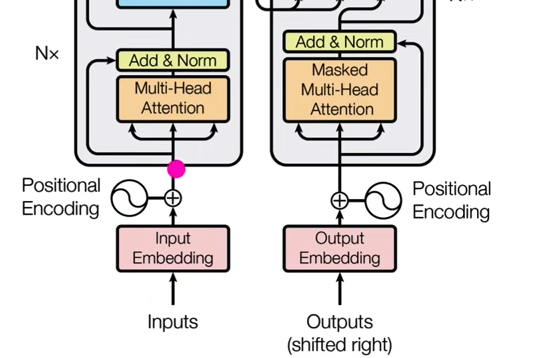

In [19]:
x.size() #x is not the input size, just the size before the MHA

torch.Size([1, 4, 512])

In [18]:
qkv_layer = nn.Linear(input_dim, 3*d_model) #to craete query,key and value; all contanenated, all having 8 attention heads each

In [26]:
qkv = qkv_layer(x)

Text(0.5, 1.0, 'qkv distribution')

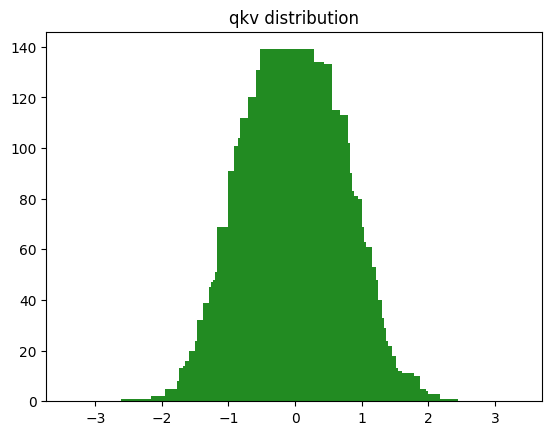

In [27]:
import matplotlib.pyplot as plt
y_val = torch.histc(qkv, bins=200, min=-3, max=3)
x_val = np.arange(-1, 1, 0.01) * 3
plt.bar(x_val, y_val, align='center', color=['forestgreen'])
plt.title('qkv distribution')

In [29]:
"""
Input Tensor (x)
 Shape: (1, 4, 512)
  +---------------------------+
  |       Token 1             |
  |      [512-dim]            |
  +---------------------------+
  |       Token 2             |
  |      [512-dim]            |
  +---------------------------+
  |       Token 3             |
  |      [512-dim]            |
  +---------------------------+
  |       Token 4             |
  |      [512-dim]            |
  +---------------------------+
      |              |
      v              v

Linear Layer (qkv_layer)
 Transformation: (512 -> 1536)
    |              |
    v              v

Output Tensor (qkv)
 Shape: (1, 4, 1536)
  +---------------------------+
  |     Q1 + K1 + V1          |
  |    [512 + 512 + 512]      |
  +---------------------------+
  |     Q2 + K2 + V2          |
  |    [512 + 512 + 512]      |
  +---------------------------+
  |     Q3 + K3 + V3          |
  |    [512 + 512 + 512]      |
  +---------------------------+
  |     Q4 + K4 + V4          |
  |    [512 + 512 + 512]      |
  +---------------------------+

"""

'\nInput Tensor (x)\n Shape: (1, 4, 512)\n  +---------------------------+\n  |       Token 1             |\n  |      [512-dim]            |\n  +---------------------------+\n  |       Token 2             |\n  |      [512-dim]            |\n  +---------------------------+\n  |       Token 3             |\n  |      [512-dim]            |\n  +---------------------------+\n  |       Token 4             |\n  |      [512-dim]            |\n  +---------------------------+\n      |              |\n      v              v\n\nLinear Layer (qkv_layer) \n Transformation: (512 -> 1536)\n    |              |\n    v              v\n\nOutput Tensor (qkv)\n Shape: (1, 4, 1536)\n  +---------------------------+\n  |     Q1 + K1 + V1          |\n  |    [512 + 512 + 512]      |\n  +---------------------------+\n  |     Q2 + K2 + V2          |\n  |    [512 + 512 + 512]      |\n  +---------------------------+\n  |     Q3 + K3 + V3          |\n  |    [512 + 512 + 512]      |\n  +---------------------------+\n 

In [30]:
qkv.shape

torch.Size([1, 4, 1536])

In [31]:
no_of_heads = 8
head_dimenstion = d_model// no_of_heads
qkv = qkv.reshape(batch_size, sequence_length, no_of_heads, 3 * head_dimenstion)


In [33]:
qkv.shape

torch.Size([1, 4, 8, 192])

In [34]:
"""
+------------------------------+
| qkv tensor (batch_size,      |
| sequence_length, no_of_heads,|
| 3 * head_dimenstion)         |
+------------------------------+
| Batch 1                      |
|   +------------------------+ |
|   | Sequence 1             | |
|   |   +------------------+ | |
|   |   | Head 1 (QKV)     | | |
|   |   | Head 2 (QKV)     | | |
|   |   | ...              | | |
|   |   | Head 8 (QKV)     | | |
|   |   +------------------+ | |
|   +------------------------+ |
|   | Sequence 2             | |
|   |   +------------------+ | |
|   |   | Head 1 (QKV)     | | |
|   |   | Head 2 (QKV)     | | |
|   |   | ...              | | |
|   |   | Head 8 (QKV)     | | |
|   |   +------------------+ | |
|   +------------------------+ |
| ...                          |
| Batch N                      |
|   +------------------------+ |
|   | Sequence M             | |
|   |   +------------------+ | |
|   |   | Head 1 (QKV)     | | |
|   |   | Head 2 (QKV)     | | |
|   |   | ...              | | |
|   |   | Head 8 (QKV)     | | |
|   |   +------------------+ | |
|   +------------------------+ |
+------------------------------+
"""

'\n+------------------------------+\n| qkv tensor (batch_size,      |\n| sequence_length, no_of_heads,|\n| 3 * head_dimenstion)         |\n+------------------------------+\n| Batch 1                      |\n|   +------------------------+ |\n|   | Sequence 1             | |\n|   |   +------------------+ | |\n|   |   | Head 1 (QKV)     | | |\n|   |   | Head 2 (QKV)     | | |\n|   |   | ...              | | |\n|   |   | Head 8 (QKV)     | | |\n|   |   +------------------+ | |\n|   +------------------------+ |\n|   | Sequence 2             | |\n|   |   +------------------+ | |\n|   |   | Head 1 (QKV)     | | |\n|   |   | Head 2 (QKV)     | | |\n|   |   | ...              | | |\n|   |   | Head 8 (QKV)     | | |\n|   |   +------------------+ | |\n|   +------------------------+ |\n| ...                          |\n| Batch N                      |\n|   +------------------------+ |\n|   | Sequence M             | |\n|   |   +------------------+ | |\n|   |   | Head 1 (QKV)     | | |\n|   |   | H

In [44]:
qkv.shape
qkv = qkv.permute(0,3,2,1)
qkv.shape
qkv.permute(0,2,1,3)
qkv.shape

torch.Size([1, 8, 4, 192])

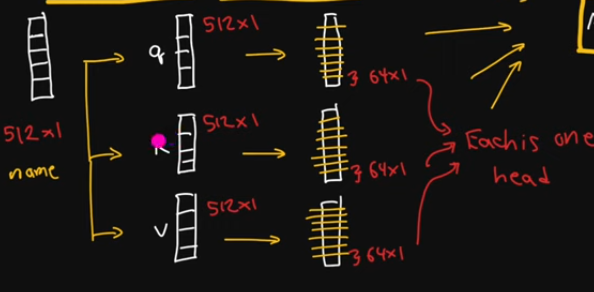

In [45]:
"""
 +-----------------------------------+
  | Batch 1                           |
  |   +-----------------------------+ |
  |   | Head 1                      | |
  |   |   +-----------------------+ | |
  |   |   | Sequence 1 (QKV)      | | |
  |   |   | Sequence 2 (QKV)      | | |
  |   |   | Sequence 3 (QKV)      | | |
  |   |   | Sequence 4 (QKV)      | | |
  |   |   +-----------------------+ | |
  |   +-----------------------------+ |
  |   | Head 2                      | |
  |   |   +-----------------------+ | |
  |   |   | Sequence 1 (QKV)      | | |
  |   |   | Sequence 2 (QKV)      | | |
  |   |   | Sequence 3 (QKV)      | | |
  |   |   | Sequence 4 (QKV)      | | |
  |   |   +-----------------------+ | |
  |   +-----------------------------+ |
  |   | ...                           |
  |   | ...                           |
  |   +-----------------------------+ |
  |   | Head 8                      | |
  |   |   +-----------------------+ | |
  |   |   | Sequence 1 (QKV)      | | |
  |   |   | Sequence 2 (QKV)      | | |
  |   |   | Sequence 3 (QKV)      | | |
  |   |   | Sequence 4 (QKV)      | | |
  |   |   +-----------------------+ | |
  |   +-----------------------------+ |
  +-----------------------------------+
"""

'\n +-----------------------------------+\n  | Batch 1                           |\n  |   +-----------------------------+ |\n  |   | Head 1                      | |\n  |   |   +-----------------------+ | |\n  |   |   | Sequence 1 (QKV)      | | |\n  |   |   | Sequence 2 (QKV)      | | |\n  |   |   | Sequence 3 (QKV)      | | |\n  |   |   | Sequence 4 (QKV)      | | |\n  |   |   +-----------------------+ | |\n  |   +-----------------------------+ |\n  |   | Head 2                      | |\n  |   |   +-----------------------+ | |\n  |   |   | Sequence 1 (QKV)      | | |\n  |   |   | Sequence 2 (QKV)      | | |\n  |   |   | Sequence 3 (QKV)      | | |\n  |   |   | Sequence 4 (QKV)      | | |\n  |   |   +-----------------------+ | |\n  |   +-----------------------------+ |\n  |   | ...                           |\n  |   | ...                           |\n  |   +-----------------------------+ |\n  |   | Head 8                      | |\n  |   |   +-----------------------+ | |\n  |   |   | Se

In [46]:
q,k,v = qkv.chunk(3, dim=-1) #last dimenstions
q.shape
k.shape
v.shape

torch.Size([1, 8, 4, 64])

## Self Attention for multiple heads


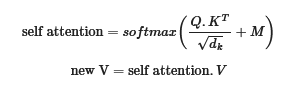

In [47]:

d_k = q.size()[-1] #64


In [49]:
scaled_mh = torch.matmul(q,k.transpose(-2,-1)) / math.sqrt(d_k)
scaled_mh.shape

torch.Size([1, 8, 4, 4])

In [50]:
y = torch.randn(2, 3)
torch.transpose(y, 0, 1)

tensor([[-0.4800, -0.4852],
        [-0.9167,  0.0022],
        [ 1.5757, -0.0605]])

In [54]:
mask_mh = torch.full(scaled_mh.size() , float('-inf'))
mask_mh = torch.triu(mask_mh, diagonal=1)
mask_mh[0][1] # mask for input to a single head

tensor([[0., -inf, -inf, -inf],
        [0., 0., -inf, -inf],
        [0., 0., 0., -inf],
        [0., 0., 0., 0.]])

In [55]:
(scaled_mh+ mask_mh)[0][0]

tensor([[-0.0598,    -inf,    -inf,    -inf],
        [-0.1561, -0.0382,    -inf,    -inf],
        [-0.1359,  0.0154,  0.4482,    -inf],
        [ 0.1203,  0.3786, -0.0500, -0.1811]], grad_fn=<SelectBackward0>)

In [57]:
scaled_mh += mask_mh

In [58]:
attention_weights = F.softmax(scaled_mh, dim=-1)
attention_weights.shape

torch.Size([1, 8, 4, 4])

In [59]:
attention_weights[0][0]

tensor([[1.0000, 0.0000, 0.0000, 0.0000],
        [0.4706, 0.5294, 0.0000, 0.0000],
        [0.2527, 0.2940, 0.4532, 0.0000],
        [0.2579, 0.3339, 0.2175, 0.1908]], grad_fn=<SelectBackward0>)

In [60]:
values = torch.matmul(attention_weights, v)
values.shape

torch.Size([1, 8, 4, 64])

In [66]:
def scaled_dot_product_multi(q,k,v, mask=None):
  d_k = q.size()[-1]
  scaled_mh = torch.matmul(q,k.transpose(-2,-1)) / math.sqrt(d_k)
  if mask is not None:
    scaled_mh += mask_mh
  attention_weights = F.softmax(scaled_mh, dim=-1)
  values = torch.matmul(attention_weights, v)
  return values, attention_weights

In [67]:
values, attention_weights = scaled_dot_product_multi(q, k, v, mask=mask)


In [69]:
attention_weights[0][0]

tensor([[1.0000, 0.0000, 0.0000, 0.0000],
        [0.4706, 0.5294, 0.0000, 0.0000],
        [0.2527, 0.2940, 0.4532, 0.0000],
        [0.2579, 0.3339, 0.2175, 0.1908]], grad_fn=<SelectBackward0>)

In [ ]:
lass MultiheadAttention(nn.Module):

    def __init__(self, input_dim, d_model, no_of_heads):
        super().__init__()
        self.input_dim = input_dim
        self.d_model = d_model
        self.no_of_heads = no_of_heads
        self.head_dim = d_model // no_of_heads
        self.qkv_layer = nn.Linear(input_dim , 3 * d_model)
        self.linear_layer = nn.Linear(d_model, d_model)

    def forward(self, x, mask=None):
        batch_size, sequence_length, input_dim = x.size()
        print(f"x.size(): {x.size()}")
        qkv = self.qkv_layer(x)
        print(f"qkv.size(): {qkv.size()}")
        qkv = qkv.reshape(batch_size, sequence_length, self.no_of_heads, 3 * self.head_dim)
        print(f"qkv.size(): {qkv.size()}")
        qkv = qkv.permute(0, 2, 1, 3)
        print(f"qkv.size(): {qkv.size()}")
        q, k, v = qkv.chunk(3, dim=-1)
        print(f"q size: {q.size()}, k size: {k.size()}, v size: {v.size()}, ")
        values, attention = scaled_dot_product(q, k, v, mask)
        print(f"values.size(): {values.size()}, attention.size:{ attention.size()} ")
        values = values.reshape(batch_size, sequence_length, self.no_of_heads * self.head_dim)
        print(f"values.size(): {values.size()}")
        out = self.linear_layer(values)
        print(f"out.size(): {out.size()}")
        return out

